In [1]:
# Load in all phx businesses (same category restrictions as main)

from sqlalchemy import create_engine
import psycopg2
import json
import pandas as pd


# Extract the data we're interested in
conn = psycopg2.connect(database='Yelp', user='brooks', password='davidson', host='localhost')

sql_query = f"""
SELECT * FROM t_phoenix WHERE ( NOT (categories LIKE '%Restaurant%' OR categories LIKE '%Bar%' 
OR categories LIKE '%Festivals%' OR categories LIKE '%Hair Salons%'
OR categories LIKE '%Food Truck%' OR categories LIKE '%Hotel%'
OR categories LIKE '%Contractor%' OR categories LIKE '%Apartment%'
OR categories LIKE '%Cater%' OR categories LIKE '%Local Flavor%')
OR (categories LIKE '%Grocery%') );
"""


phx_from_sql = pd.read_sql_query(sql_query,conn)
phx_from_sql.set_index('business_id',inplace=True)

/Users/brooks/miniconda3/envs/std/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


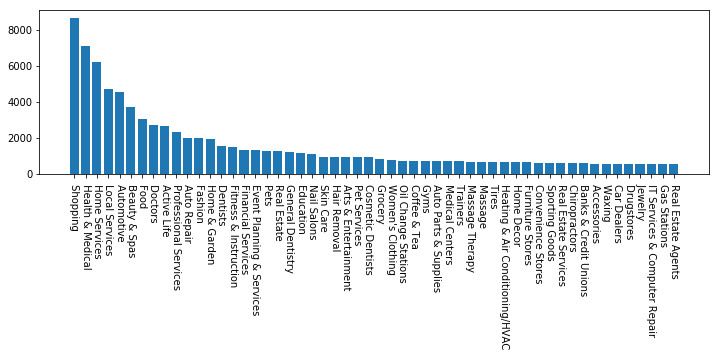

In [2]:
# Optional: show category counts for everything
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

# Show category contents (can modify SQL query to not drop restaurants if we want to see those)
all_tags = ((phx_from_sql['categories']).str.cat(sep=', ')).split(',')
tag_counts = Counter(all_tags)
df = (pd.DataFrame.from_dict(tag_counts, orient='index')).sort_values(by=[0],ascending=False)
df.reset_index(level=0, inplace=True)
df.rename(columns={0: "count", "index": "category"},inplace=True)

df1 = df[df['count']>500];
plt.figure(figsize=[12,3])
plt.bar(df1['category'].tolist(),df1['count'])
plt.xticks(rotation=270)
plt.show()


In [3]:
#Open up headless browser to run DuckDuckGo queries on business names + "Phoenix" - scrape resultant links
import time
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1200x600')
# initialize the driver
driver = webdriver.Chrome('./chromedriver', chrome_options=options)

driver.get('https://duckduckgo.com/');

start_idx = 23413


for idx, business_id in enumerate(phx_from_sql.index.values):   
    if idx>=start_idx:
        # Make query term - business + "Phoenix"
        print(idx, ':' , business_id)
        query1 = phx_from_sql['name'].loc[business_id] + ', Phoenix'

        search_box = driver.find_element_by_name('q')
        search_box.clear()
        search_box.send_keys(query1)
        search_box.submit();
        html = driver.page_source
        time.sleep(1)
        savestr = './google_search/'+business_id + '.html'

        #Write HTML to file
        file = open(savestr,'w') 
        file.write(html) 
        file.close()

        # Wait a couple seconds before we rinse and repeat
        time.sleep(2)
    



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


23413 : KqS6JYUAMCq9quF7nDhUCw
23414 : OyJtKE5LC7ufgFxmrTo5nA
23415 : G4EerCKqUhjQ5-4mDgCPBA
23416 : PymbbcD6Eb2SVqxSBcP3CQ
23417 : cW3ZRUC6UREm2gW4bPViSw
23418 : mPBUVLUB9rUymXbGLi7j3A
23419 : ewQ3vMYYULG78tSSHib2Ag
23420 : M2QEp5tIjQbWo_PQuP5grg
23421 : 4GNsiTBn8YJaF7Z4eT3gzw
23422 : UuCK4wM7Xu7fNkEkk4zbMQ
23423 : E2eZhVfICDQtA5zpgEFJ0g
23424 : IK-VrSnhdzo56HFPaf-VZA
23425 : S8vtNrmt-tIuM4eHtf6gxg
23426 : S2JYtOaYSWSJrvu2cizMkg
23427 : t7vAdzY08VtqQLohhEy-wg
23428 : _G1C1J-syqfRxD0tqTvEuw
23429 : 0BwEQU3Ly2Xxt2bF88t6gA
23430 : Ino1gpJwW4dOEK5UNWd55w
23431 : mscy_zbXk6nYUSapVsw20A
23432 : p3EiKlzllwI7Lwd3QYNGCA
23433 : CiI3JpHfTasubgC4VDNQOw
23434 : QDEIQj78rAJZJbuEEIh3Ow
23435 : wxRibA4naSI96qyVgfoN7A
23436 : g3g2D7cPkJlLIdniad_inw
23437 : PeNVAW8sjDiejCE4XQB-0Q
23438 : TI9Npde1S0YcG9VYsNtYJg
23439 : FfiJe8TnTm6JOX-4saawJw
23440 : _vzGhHbtKJwjYtovgCcodA
23441 : H3hgr3-mPP5vDPz-T7v8xg
23442 : 6MdJUxaHAWFGyLRXsnVxDg
23443 : GZFVoKzTyrtRjd5RJ_09lA
23444 : wHn5ekrhv_DsH2p3fjAung
23445 : 

23678 : uZHAMOFuvP9HUMTXhRixFw
23679 : rFthhn_lQUoawHN6I1Ek-Q
23680 : 1o22s-nnlwExW0jkp99Zqg
23681 : RjBvXOV2PX2-_TyKSD52Fw
23682 : M1Aruot197ZvTNdSqjRMmQ
23683 : _7Wp4hqOTEIk7BIpR33RDg
23684 : gLqbouSQpXK-Dr0wA2Ih3g
23685 : BFJiRTxXYwaIjr5C5wvT5w
23686 : oH4oOkYg_E55-xp1XkF-0A
23687 : _v2zCnIE6aF0JGskzZHmNA
23688 : MWIqFMjQsS8Wv2LN40LYMw
23689 : RA7CBxayjLV2cDXU7JB95g
23690 : kh1qRqxXPrKhAZLBd3gvyw
23691 : 7JLeWE-rx6ahZU5MsbL7zw
23692 : X_ug5g2FYxh1yDIb510U2A
23693 : wt9MpJtGDk7lPtL0P1EffA
23694 : C-I1D7Cvz4KRrl0Dh5hcqA
23695 : kkLwDyCPG_wU_g4LIhCQ8g
23696 : 3J75SkvgoLikY5Z4znmHjw
23697 : 7gp-9Nx9BhTE8rh_hACDdA
23698 : AKuHtg-xNTtMLEL35tbWVA
23699 : tG2NMoP6xPDxQ4QM62dqkw
23700 : odwDM5iEnNtTtvOqzJjaLw
23701 : oGlIOWdOcAkq4_8IShjQgA
23702 : EqonBR8TBL_9gQaRclfHWg
23703 : DGOQnS1W1L5nIFfSCKGl-w
23704 : ZJ2XEwipCckNRhkkJN3qCQ
23705 : oGNEP0jwqXbr1PVfRXYQBg
23706 : yLt4yt4FJmwL4E-ZSTMUHg
23707 : tktorxzEnFYEXE5CkQTP4A
23708 : XbPs8EnNMof0VNDMnkUy_A
23709 : gHer2evbgPyu5X5mravY0g
23710 : 

23943 : b-LG8093i7Xc6Qchgka9zg
23944 : -GS7mhPszZSJtfDwSdp6OQ
23945 : 41KP5aXtaOYBzQ5W36oKYQ
23946 : irQOn9PcQ7ricEvx_TXkxg
23947 : MW0MzSxC0fB-YRzVfxT8hg
23948 : lqfOfd2eb9h3-xEEx5-8vQ
23949 : sS3LEL5mteE24uTP-8hvOw
23950 : FSbyhKcrKsDBMPCtn1FeuA
23951 : 9MeEmv-255NjnwcK2RcByA
23952 : 8agTGwDwHbgVF75Ol_5K9Q
23953 : Wl33gUSRNpWth-Z5li4JwQ
23954 : bXCI53RX7m1dZSko2jE-Dg
23955 : kwUo8wC3KRdRiiHfxfW-iA
23956 : yGJyACbUiJhzOKVKbAIs4g
23957 : cz8AVitBVotXFshjQAvhRA
23958 : sHfkXJTnmUNkTAuczWrMjw
23959 : D375tikd3GajmL9mkbtN3w
23960 : eOgwOuc8twXqs1v3IzvtpQ
23961 : m0pO1k_7q-p3ETsvyRfquQ
23962 : RnppmcoSs8xOmEuQxHaZCQ
23963 : IojMLN_O6dnBeAzDWJzyNw
23964 : zID_FRxdKX8rCSM3QOpThA
23965 : kPOgaG8PZB3EkhcSdbSC6Q
23966 : d_JAnUnNNLBo0y4KbReWRw
23967 : oM6vBO0UEJB_uuOt9D0GSA
23968 : VOv6TofEHWFuH00m2e5v9Q
23969 : NUSCmGe1txKYCeZxE9X26g
23970 : yKv3KVNzku5EypZZqRT9gA
23971 : 9HpM-U6upTDUGAx7Wt70ng
23972 : 1hyCCKi1QHHxQDXI8je2YQ
23973 : ISgQQxda3smdokzxxmQmKA
23974 : cPnbRIwfLX6EZSP2aahpIw
23975 : 

24208 : nSDVzkb-inyhQaDw291WLg
24209 : DiftL8KjL6_7wU9NdMy5fQ
24210 : q-0xEnf7HoWNaEc9sXqZ9g
24211 : oNX3J7yDgiWyUQJCGeWSTg
24212 : y-AAg4htBDPMMh8nV5oeEA
24213 : 5pDKcvD6atcPJmbcm1AL2w
24214 : AyWw-uiAhLBgGMv54jD4gA
24215 : c--EoxG9Z56I6hlwe-DXuw
24216 : HqLQ7QwTc5D93Ozm8FnStA
24217 : iVvR3l-8ZpqYOJea7b9c4w
24218 : _4fyHCfhvqzMZASsCTky2g
24219 : wTfk2c1xyTQMM74Z3jz-hg
24220 : 8FmQbGKSvYsmFoOQQnYqFw
24221 : vgL9m91bji2bURvhl9RqsQ
24222 : 1kvZDub-yS2rKHmxpSXy9g
24223 : UDGIO9hUXg-uB4pQr8XzfQ
24224 : mB4sixJJo5hSIuZEWILdXw
24225 : K8QC24KRKKE95REI8FOIZQ
24226 : DmUH79s03PG_uWJHSzPuBA
24227 : RhESiS-S21iA0JizhjutTg
24228 : qnyTJ39UXke3aAS0gdWsww
24229 : XSUKqgcRu_pk2QEYwghPvQ
24230 : I1XKPA5cU5e8UDYVkxBcTQ
24231 : U1QABk2PSkzTfHfPb_tZgA
24232 : tiHdZxzAiJ_hSdCl9MkInQ
24233 : KM2wWAYm7ro4435zw36TJQ
24234 : DRH2DRochKr7_sY2YOc2GA
24235 : dOY82bbDSkX-_IFElS8A6A
24236 : YPla5aFwsirtgackm5Dccg
24237 : SThFITkPWAQ-7eOCPUb3Xw
24238 : Mu21JKk4fJre7LNU7-e7cg
24239 : aXzJvmWFta9p4qFsa14mtA
24240 : 

24473 : hkmaUwfNQtFAJFpxYOHBkg
24474 : 5UrU716-2DF6Z5wEhIHG4A
24475 : 9IX6Z-KlyxZWHnCutMskmA
24476 : fCjiNxygNQXcNKaaDBUhOw
24477 : ujCUJYftRiAmVdtjT7W2cw
24478 : _-usFkM2oHx40rB5TZ5pPg
24479 : D5VU8PCEogvih9I49jlwDg
24480 : Q-S4isvyhpaqwWu7dLiDtg
24481 : QQ3OkqXaIux1mNaE3ozVDw
24482 : jyXNb2QvxTP4XKVWos9rKA
24483 : 51GGJmPgoq65uu1zISA8hw
24484 : WliNOsV_wb2zMDtVnM2Udg
24485 : H5hoJKbpZxW-Df1vzjBCOA
24486 : 3Mb5S1Y7Kgh2fjEO28iBmA
24487 : GmVH7pYNNkY0rduOugdMOg
24488 : oaKIZDt0R1qylXe_QoSYIg
24489 : yaVMvnvQG9MD3HcSifIFAw
24490 : hdYiWfG-puvD82_3z72LNQ
24491 : 1cbjD3f9UL3y9cFcORhpjg
24492 : sL8GLbN6pzkBmPyMN0j6AA
24493 : b9SndQx7YG8VW82HL1FCfQ
24494 : V4vdG8nht92rb_1QGH3NCg
24495 : EIsUKEwRo3WTCXzhENLVdw
24496 : 6-1B5PAD3dPbZy-Oq959iQ
24497 : ANSja66PeMn3kli9jctykQ
24498 : Z33gUvajlHNn6xGuuJexJQ
24499 : T3y7m50JXsf8HI66L4f72w
24500 : Jg3P3vE3vqzHO1IyHwnpYA
24501 : FhXFokRiyjyEraG5hS0EgA
24502 : 4BVIx4Edkb-R-mooWBQdlQ
24503 : 7TEp0RZEvkUqHj74n34eKA
24504 : X3qrbOkhdCjm0NTBX7T80Q
24505 : 

24738 : YrC6QKgIrjM4n4eOqN5_Sw
24739 : gdgRVBwa7Zu-Xe2lUhciog
24740 : ilRPRaDQXP0jyr93Kj5GIA
24741 : Yg69tX-BwhpsnfRvJmCXXA
24742 : WS01Lvr7grGxOEqukrLzmQ
24743 : ze3AgRdWZmneIdpZDmxJuA
24744 : p71To0k2TxivPXCD1OUmBA
24745 : mfwhKMTZ-209GfA5GfVQ8A
24746 : vik41mlJSlz8_iG76BTp1w
24747 : E762cXL16bSpm4Ih8XWZ4g
24748 : dhf3A7K8aBDh6y3KgSSeJA
24749 : LErSXCAHzP4uEw1RJzDhHQ
24750 : Bb2rTMxNpFym3eKYvcuRHw
24751 : 8suT9dv0cEWXR3csdPbq7g
24752 : o85LwIuUvdJf6A6cRLD1-w
24753 : nUI5OlfIY04xRhIyv8sBqQ
24754 : jPuxJTTKrDaZ0ZZN914EnQ
24755 : 4Dnrqj3_-EjmqbPtcl5BfQ
24756 : uYZ-cBB5CFbG2ucYLZaypA
24757 : PD-7uW4M-DqZKLy-fbAK7w
24758 : yXYeLlHvCl4NbWHqwuj0XA
24759 : fIqJXdqTrokeOyYpMVxhfw
24760 : mtSPx0N7fVF0NfZ2oCNbeQ
24761 : mw1MvAg6hKegHunt-Bsgiw
24762 : xdqki9S-qMLBkBWkDRY_Jg
24763 : 17QE1Ps90baWOhOYsMxDDQ
24764 : xD4rcgDRH6dVtAa8iPevlg
24765 : dNIL6LU0JTVoZXRpExcB6w
24766 : 1QPPvNie703aVAM-elctCQ
24767 : i4XJ2g6spqLEyKFqNSfFUg
24768 : 6auKXk2M0iGhZ_k0YXKtGg
24769 : CYHfhh9V3zg8H4h5aiMXkg
24770 : 

25003 : yE0-Wnz1E_-Rv7xLfld4Yg
25004 : 4-eLfbZ_zR10QG6VF_4Y1w
25005 : ukQjJl4OrQyYLx3IhBFVlQ
25006 : T77ZF9Pl48GQNUMzbYt-bA
25007 : z1Tul-L653yVLOYBlcqM5Q
25008 : zcb1nHcTuMRmWcAXkeDoeg
25009 : k5tFwpKne0zxWf-hCK9yMg
25010 : XHxeDcbfDkXJdOOrmYgdJQ
25011 : uzfc0FPmBTRymrzq0ZWbUg
25012 : I_dXA5im1doHoHck3-rYKQ
25013 : AzZldizu_tF9plrxsj0JGQ
25014 : pqShfGroBftDs1M6GxpGGQ
25015 : OOQa0NzA1FNl46Uoznvp4w
25016 : 44OciVg1INyBrqINzWmSiw
25017 : UFkpJU2tm3fjiimSrF51sw
25018 : eayKoPPyc49lHYwp-JDulw
25019 : VA5YW8-_JjcDMKUiEh1Hkw
25020 : USAUF7nzmzh2nhmwih1L9g
25021 : cgDRx5Nf-NRPx3Infjgt0w
25022 : NAhNKaxcp27Je7G7cqkKcQ
25023 : plk_T2BfbqTOg0i3ABgwPQ
25024 : zpl5Q1EBVMuJ6gAFz15c_w
25025 : tk4DzF6h-1AOqCJJvE330g
25026 : vrG6yY24OQXFUpsSqMGQEQ
25027 : 4FNGIacctq8EsbzCPClQnQ
25028 : UbOTJIKWcbTed064fBd1yQ
25029 : TgqFocItVEFeDhsXC0luyw
25030 : IzHGPcs6IvJh7KecjhIWgQ
25031 : pAZg8P87w88ZrwkoivUXGQ
25032 : dPRHjbb3tPoZOZXrjf85OA
25033 : fFTdpSrufCGQmateB0Z-6w
25034 : nD9ofPddDkModwMPvs-FQw
25035 : 

25268 : GkTL2MO57hhohzs7Z2dmZA
25269 : unyAIPrEzUyt79ZvAPbTXQ
25270 : jZA4KF76_v-rxukouzNzYQ
25271 : VxAczIkOivLvvLE2Jf31rA
25272 : ZzyoHzsu8LLs7kD_QSCUwQ
25273 : xb7uuy_J3e4JPsopaRkBLQ
25274 : k2Zr99LMNhkKWgJrTcWFpg
25275 : vNQAP2As0yPLvhof6M3ydA
25276 : H74W3chN3kShyZB_v5Ihxw
25277 : a7O7w10onO9O2ANTszawLQ
25278 : m22gVk8fZsPVliE4lr8D8A
25279 : QhGzf8NANG0L-7pivePA2Q
25280 : CTnL5sDAfcSlaInNGxq-9w
25281 : afBlLAqZM_plEy3EFnzYPw
25282 : CiOQ9oUDt9lH-z-cR1ngOw
25283 : mLGSvpAIPe0AOzHs4FoCmg
25284 : O4hJF5ULSOFzAV0bXhKTOg
25285 : NSSDcgXfERBKCCcewDbG5Q
25286 : x68clWieHTItm4YIcnhBMA
25287 : T8EUwxwcHGaKgnT2ZLNtgQ
25288 : DVKOnfFr9SYSA62AuuuTHA
25289 : zfTw78UO3-7EDa6Ulnrn7Q
25290 : u9tqgNRDfHc817QDHjk0jw
25291 : JddnPGMDg_JMmbC_vIiPIQ
25292 : A3FA338dqsVE-Y2-2-ZqtA
25293 : vE6Wolj5CT7pEPecqWy0PQ
25294 : oyChBi-c_z_fYeP6aBXgVg
25295 : u4eoVlbGMRvIC1ZbMg5nVQ
25296 : G26LyRQBMhrXSVJwKJLYFA
25297 : pLh_8_xt8S_sxLu20ErNkA
25298 : xNbihGQNm_hfoxsPc5MKPQ
25299 : kL0EH-YjVRB5EM6O1DGA0Q
25300 : 

25533 : NXoGguzSd3DrsaGRIQXLpg
25534 : 2wFzuv_j5rOJi43GtMg_AQ
25535 : KFoJycdQ4t5QUl1jM997ag
25536 : SyK4wY88mb0fNFxOkYUY0A
25537 : 6UbcMDyimSHpPJGkMOQftw
25538 : u82B4a-NIJaM6XkrZOQmiQ
25539 : 1Jm9RryI6hDg5tSqqIeMfA
25540 : mbGCOhoic382d9Ofd0K36Q
25541 : 95G8Ko4k3xGkS6pXbCB1Tw
25542 : bWn_D1Ni639HVkG9xXGUqA
25543 : n64KfTWONkAd5ir1ab6Ilg
25544 : ui42muvozF9V1_SpVw4MUQ
25545 : xdsO8fdpgLBq3hB6tS2aFw
25546 : RbFLWFg6TQpq0kKhAr6B7Q
25547 : 3ysQ1LOk408LmRM4D1oUAQ
25548 : yo1G0hD855DYmU-YVlIKcw
25549 : fb2UpOEHguNP4YGX_63kjA
25550 : b1SPSd8VqdwtRWKRzHZ1Iw
25551 : fbIorGUz-kLokWuy5g7u3w
25552 : w7KdTDUleAQeEEMpccz6LQ
25553 : CqZGxI3-xonwYr6eAKdNiw
25554 : kok6kH9cqST62-BknjhBNQ
25555 : 8ocGcC1jET4J-Tq7CJSw9w
25556 : r2hkR6_Z6ykEeHajSQKMzQ
25557 : q2HufEKeeSMRGymZ7CuHrg
25558 : Mneuq-Ozyz-xSx9mVJSWnQ
25559 : B0PEVucI2-FJH0vz50teWQ
25560 : KrYDbrvfZVTlmC6M89zd9g
25561 : drGLtY9U8WumWa6p7tdEoA
25562 : 3hd9i_It7OzzEJ6P3WGNqA
25563 : oJCQD8oga5XL3V8wCZh-nA
25564 : 6_FYvHfm-6bI-erByOKNIQ
25565 : 

25798 : G-53co2A3LSt4AoY4VpimQ
25799 : 4LhKzv61OH1Q_dhGjASCpQ
25800 : kzAuYaK5h53-YESmNKqsHA
25801 : 2SWWUyyMfmM6nqXaB0Fm1A
25802 : linS5fXTCcL0wfDLiWodHg
25803 : afiHPr82Hn4AzMQXVRaN8w
25804 : X6q4z1bwcVS3b8LXo8p6vQ
25805 : iA6IwYzo6qDmY7dZfXdzyg
25806 : Y7MZ_1WO5pQPQp2VZLulLg
25807 : iiWrhUTxvievl9_s8qEU1A
25808 : juZ_z2SHHoXB26j1mkwhNw
25809 : whpZIak085kT8JnauDvUeA
25810 : shw0ZF3AXkage5UxGZM2wA
25811 : PxEBztsJoFUGnzOePct65w
25812 : RdZDCW2dKdWDeOPFwGOsMg
25813 : _RLw4iuJ6MEYp1BZmoPV0A
25814 : BcgSTNCsLB0OIetCT2Psgg
25815 : I9JUbl_5Lqm7YCRkI1xecw
25816 : gclhewtipQXyJl2WVsQ7Ug
25817 : 4dG1QdAF9sE7c00Q-VVkMg
25818 : NgdxhWtyNfmT5AmxGYtfxg
25819 : btMzzIaUiYwCVZbHDJYuTA
25820 : JJZRFWPqbD8n22u_UP0HPg
25821 : jI0B7zaALNKge6eFma3M2Q
25822 : M2pWJWW1T-oKbOjnPiQwjg
25823 : nkRjgilwo-WPy-8l2V7iHQ
25824 : 5ll0Byvtvp468m1dEWa-mQ
25825 : J3w2hLfV55bswBeQYFg7Og
25826 : hNGaN6Kk8N_LySAcHYp5kg
25827 : gikK5Iui3q07dtbSfheULQ
25828 : QpJFhJ0CFJGsrL397qEchw
25829 : tFSZNaGzcMDlcJ0UZQVAuA
25830 : 

26063 : p2pzAVsJQK4eKBbaJi1y_Q
26064 : njvU7Al2GcmvwWTNNTBePg
26065 : NikHSweMx-g8tglYBb7VGw
26066 : JpUXc02O7Mzvv2cxqYyJUQ
26067 : nzAy8A_Kj7K6B4OyZzNsnQ
26068 : XTUFys7dzAA3sO4HXWJavw
26069 : -Ug2vL-ePWNf5dpiZGK5Yw
26070 : gMIAuR8Xgg6x72zSwxwyCg
26071 : 9npQ0aqMeOncvwwdxopQkg
26072 : 5iyhc3T0T2WJYBFUGC2dHw
26073 : 9IaomgzTHXsNkZHnZGv8fg
26074 : 5xSlKZRNl-hj31jSwqK5zA
26075 : xo5W-5YWrelt5JOM0y4Jiw
26076 : 1dfrs_FN403fLRYqF825aw
26077 : uHeVilpRpONQvN_yFGtKTQ
26078 : CZlR-l19C0Retgome7ZJEw
26079 : DURzhNhnGVmAwR6qgjFVgg
26080 : 5E4lmDN8Doc0Wg8hGokAow
26081 : Y83f6yx-ZiMdAtOCO1xJXw
26082 : -4-2NZvqC68eOCiwmCQTiQ
26083 : DXyas562qeXhww2WaYcqcg
26084 : HFILriC2cQo61fi3l_xsbA
26085 : YCej97g_ktL-h7lPZ5_STw
26086 : nDpQjxCvO3hcOU9EUHAvZg
26087 : 7TfcIYHJZtHL9T3B-6LAJg
26088 : Z3Uua6A3aeCsjLUX-xe7BA
26089 : 892Gqt6KORAIGfPJZh8LqQ
26090 : YrWG9t9n-8N8x1YYPHszBg
26091 : yHK-DaxFty1MWVuR6FprvA
26092 : iJSJFjXWxJ9Pg8QirxXsxg
26093 : lI5pgX5P-3Rxa5sMWtzvkg
26094 : _C62VL3O6OwRbJhEcv0f3g
26095 : 

26328 : e6o0L-inHJi8nGfciLdRhw
26329 : V0DQ4Q6lM04nk64_CeWBpw
26330 : g1-AP6UyioLtYpjwQt2gEg
26331 : N0IASDvVbHVrXEzqnlwiOw
26332 : seuesG14-cVIv5zoc11uiQ
26333 : c3kEMRc2NV4T_DcbA_IZrQ
26334 : g4o5aJc1nf-soyKb4g-vPA
26335 : 9MbGG8PxrlpBWVm3QyWy_g
26336 : O9Ilv5soiAcaItIiYMFwnQ
26337 : 86v_o9M5-_-EAVSRxPZTuQ
26338 : yZb6xTr89Walnpr7QphcIA
26339 : 8jIaegKvLEdCSwcr6T4LKQ
26340 : hcCjc1kllKpnIbKVcH42wQ
26341 : OJ43Bwndc8LzrXQPw04nmw
26342 : osPj-x3YpZ3_B7JO_g4alQ
26343 : nawDRflYOlZFqq5mVM-liA
26344 : y3JJqoFHhkRqtfN8TjI6ig
26345 : 6qXac4m723G2M9JEXJ-tLg
26346 : rCVMHr5kQK5-2kzo52xSlw
26347 : gp6TlgAB6Irywz3eWkHhWA
26348 : s7dpxQY4pW1YmrOh5Che-g
26349 : NUCAqeeJWU8Ct9u3Qb-gyQ
26350 : iSBC7ZDjd0lqUy62y5_g_A
26351 : mQafLdogkNZIlksm_4hvIw
26352 : NDmrS_jwq37l4UG2MEaGXQ
26353 : aMStafvGkD940o7k6vE6ZQ
26354 : jpv0QX-i0sgjWjU03O5xCA
26355 : tIzzNU9TDSujJeO3YLwKDQ
26356 : Yd7H9VvU4Euyguxwyrlfkw
26357 : 6sjxthgfjKF9-RfhOPaTLQ
26358 : gUfl-YdbnRuTx5msXCv1Ng
26359 : 76phOdww5kJEJUaI8aAB1g
26360 : 

26593 : 69BT-KSvNKvxbgBd0S50RA
26594 : O268sSTGK8EDM6g1GZA8YQ
26595 : XY4KEhXulrERavrdFM2mEA
26596 : o49rvwjgDqHEetTn-BoC_w
26597 : aomyg5nd8eU6Oy82-cqnHA
26598 : C4E-exfD2AUG5OTTskSX5Q
26599 : E__4x3iZxO78iJqs_cRz7w
26600 : Yg6u-bzOYYHIGc-vtYCwhg
26601 : iglQKzrDD2rcoNPiKUnqXw
26602 : ZX4jTKBXL9tiTJBy203K8w
26603 : EzGLL4GdKGAwA8MNH68WsA
26604 : nN8WITazXsj1-eQ1b0jHtg
26605 : 0U-1Wkl7y-wv39qM6WKL_w
26606 : Bn8Z6cr92ErhwdrZOCR9Jg
26607 : xMpqChTLAFnUGBb9mJlsGA
26608 : ZHiT9EIlnKMqbpBUmxSh_Q
26609 : tsSJtuCbAGIYo01rUoygtw
26610 : zozDbmbRJOt6UKHqG-71rg
26611 : gM9hqkDh0wLAhCt4NXVAcQ
26612 : zDMrw0ZrXTjTXsTqlUxmBA
26613 : c_7IPxRwSYP-4uWm6v7_EA
26614 : pZWkAFK2Dlty3H5RdC67kw
26615 : ODoxMNs54mb2N728JtNFNQ
26616 : rVvpw-muSFtiYsTvnmTOiQ
26617 : cEnxJLRpabJi7MMUez7QyA
26618 : g0tCaTqUiDDH6PaIUZu95A
26619 : jW-fT5EhiQAxuyCT9A2TSA
26620 : t1TLJcQ7sPxf-QgiQDVSjw
26621 : LzC9Vg9p05k-fLm5RSgd4Q
26622 : e_v_3mI7Z3XxjS4Ew-tsXg
26623 : q3hs9QQUazIzrQ6yyXnXfA
26624 : 9q9jqMIcKIEy8bO9aLi_Sg
26625 : 

26858 : fSOSyDi35wAWhBMA1VY3-Q
26859 : dAm_BOS-Qiz8XiERwjyEag
26860 : 6FJPYM_xtgmcNYY1jcK4sw
26861 : Qu5PtrxKZf8XCCksyx8Alg
26862 : 6UhCuObwzhEYOmj75T7Nzg
26863 : 0BGsnXjVVfEQQcNvtZvWlg
26864 : H7dPUgKTGu9_t3-9bewDXw
26865 : AsZiCFc-OUClom4zPtWo7g
26866 : dDiWumkB_Ovv646nJ5zySA
26867 : vH1q4ucsmCQ0obs9mvJa4w
26868 : coztc8rde7-EWkmt9Y7hLg
26869 : JZk7r9JemQ4hgZUaf2Lw2g
26870 : NReZVyrnu8K2-4cfssjRGg
26871 : B5GTB6DN7lqquW5UwrqXag
26872 : kZfRWdmmJ8HsBhdSzKQ3uQ
26873 : 8KSJxA-iW9m1YTLnz6d21Q
26874 : TrlnEABWIKIFxT2dKL85pg
26875 : wyMxoVU-FtkC5TosQcIIEA
26876 : yo7GU-a6IKZIfNF1aNVGuw
26877 : ujnkGDJvDHiq7hT4tl8xxQ
26878 : wOWIm1BdwTsuKw8vIkB4sQ
26879 : Aai2VrsMldvqEc9jOMjjTA
26880 : Eo0lN0i316CMDaAvG6EiuQ
26881 : ik86UbuXqksOP__Q9yeS0w
26882 : JKU4Kk4p5fzv0TFapUnyYg
26883 : 6uLERmN7HzXEU7HkXqzrSQ
26884 : 6WZsBdavzgFyznxvvaMOig
26885 : x7eXxoLD5GOaL9G4DGQUPw
26886 : QIQ39xlQXitwEegKhdyL5w
26887 : XBJ7Goe7TyiCl3ZL6dYxKA
26888 : 49gG0XaVY7Nirm2Ss7ArHw
26889 : 2mNm4GjZW_z1L6JKKH4tww
26890 : 

27123 : bpvFsj8Sf5YgNAe1vTYX3Q
27124 : iZgJ-W4nTGQgMkblRx5YgA
27125 : Mg4UA8_VmM0i0iuxnrtH0g
27126 : UVVbPtJ_UfVMZtfd7EFvyQ
27127 : N_Fl9ot9rJc7LZ5_Cr4T0A
27128 : Oc48lSdPyu7Ifqll_wLtlg
27129 : mPnzEsjCYHwuOHV4jr0IXA
27130 : FToXQnvi08cmgnx6JtXEUQ
27131 : ZC306QpnfK6xOnB-2zDpGA
27132 : dzHiixYF9f37QkMUa4zYZQ
27133 : uWHL-K6_PWSdZaWaUyWuPw
27134 : 2Dvd3ZDIFWREMUBMLsIb5A
27135 : R213S5mOt1SGrr0G_lyapQ
27136 : eJQKtohiBGT3LeQxbb3jMQ
27137 : Sivr6qDvLo2yHewbMnBlFg
27138 : xEEfCdaCWkkemUVdak1GkA
27139 : kAqWep0rl1LW3qgHITi6Vw
27140 : 8cx6pcaVgEZnS3edoYvImw
27141 : ALvsc69ygqJfG5wLRryj-g
27142 : eCTOdjZBm_Oq8RuWHTfKgA
27143 : cYwH8kIfuZO_wuVz7CRlVA
27144 : JcvzGsduPleBbUfVgfAtyQ
27145 : twoxa0_9sn6ZN4j40kDsuA
27146 : uBAHE6QOJlndILPIoeEpCQ
27147 : 6V8MsieWkWxsCAv3ftpwDA
27148 : QLqdXnaDF1NMDjGrTiujow
27149 : 8GoJgG2n6bICXm_d9UlQFQ
27150 : bzoIlWnc3-E3jZCn_VfkhA
27151 : 0xE3zU483xDk3scM8XNCqw
27152 : f1kUnxtmcMCBFVzscQKAJg
27153 : ybO3Ogbk-cOdq21YuU7gRQ
27154 : pfHXz3J0tI2SFHYq8nnI2w
27155 : 

27388 : KU1NZKMLGW8DRZYewYXsqg
27389 : cdPES0ZwjQq95UGysNL9iA
27390 : UCwX78D3NbMfm9doeBe8cg
27391 : mNBp4KI2goFJKDB9VLGP9w
27392 : OWw5_o8eLkWs5pJLCfjWeQ
27393 : bGRy_-CNea7Mopja6XMGMQ
27394 : kYJEXJTh3s6yWs7_fKTYdQ
27395 : MBO0TVKLZx8V1TplDRpo6Q
27396 : TDZGTk_7Vu5Qtk3faamu4g
27397 : L_x-I5zAZ3yPjH72AvIhbQ
27398 : ZymhNdc8PuMXSFhVvnEL4Q
27399 : I1YHNi3diQl74LE0UfSmxQ
27400 : 3QmZ9duzXqIK-2ZxoY55Lw
27401 : tf6wb2F-1hz-e3xBU3pr2Q
27402 : 6qhVDbpuYWJ9GBXEHr9I7A
27403 : JFGeQs1uAS0_NjnPQ1HtHg
27404 : pmprLl6S6z82fnxfiEZdUA
27405 : f1NAQGOPiqNnJvQbDB8IoQ
27406 : tShJjONEucuIVvkBmEHu5Q
27407 : HBhPneRqcMi61d4UAetmvQ
27408 : HvID-Mf5NzRWr-AXAd0vQA
27409 : n2P8n5UrKZ8JtujHCv8eEw
27410 : VrMyO1byat3sgII-FyagGg
27411 : GG1SmiBnX2PULf4myqH_2Q
27412 : cop4XVu_UYSMSloLOPzXsg
27413 : CyjNzyLJDlcSAoVhtPYJog
27414 : WGh0GmMO000UZwdZ8kKdxg
27415 : OYqz72OY-0rmUg18r3SyoQ
27416 : rgUkVpcYAb_CVz8ZN15PCQ
27417 : Y0enCwfSNDS8gNL9XeekJA
27418 : CFJ_a_1gyVTbnMldwb9yIQ
27419 : 9KC4RoWKQdqIaV4iiezerg
27420 : 

27653 : FHs1a92b-W_WP-P8WaujQw
27654 : sY6hLHFn7oMpod8s0To6DQ
27655 : rk55_OuXryzQTexDlvsa0g
27656 : L0Ec-nx5Mh6lc7CZ9v2olQ
27657 : nRFz9aOx0El7mTOIVovlYg
27658 : 7MRAmag2XafxCYt3Mpb_1w
27659 : C9QNd6qXSRgSy8n4OBf2mA
27660 : EPDq_V3hz5LPQd_2cuzjOw
27661 : K0gpWF0ASHjNbyaPLYe3dw
27662 : _5eIyiWWW4TPmWGLNPgNgw
27663 : QWsykEGl2ZxZDTKhN5RYGQ
27664 : S0Y1TaGFVvkWaMT1X0Lusg
27665 : HFXjrI9tS9B8d1S-xighVg
27666 : rfrqovOJpLVu6RRKN_Azlg
27667 : BbBkUPkdnHFFRE9b5oDWbQ
27668 : 3oz6T_UXSNczRa0uCeRpng
27669 : glDrKkRn3ONc8pZ9wmOcxw
27670 : XTHmLmt-f6X6RAahYXDYGg
27671 : wChfPQlko7wWQ5LeFb0KTA
27672 : tpeYS4RUOdXFLECsAJ2j_w
27673 : dZA1kAzXdGY-umvPebulFw
27674 : uZRxxen2bK6AszCZYGIgcQ
27675 : Prvv2bwNdvicWEj0nSrgBw
27676 : OrgVKwVLHEMXprf_eR2KrA
27677 : xSAAykOm0H7We4_i0vMjiQ
27678 : bGpeYUxFxCyimROl2C_vog
27679 : Mks2gf8IHa_w6Urb8R18_Q
27680 : upwQD-qLOwh9ziSfv4XVYA
27681 : QSepZEqX_zFjkHxo2b4KBA
27682 : LPzx71DCvPyNIrPdbKLDbg
27683 : FyDP0xY4nY9u3LrMRyPhVw
27684 : PimM2W3rLX0nwSBHAypb8g
27685 : 

27918 : xfEJQ_sakwvpKUKDKINVKw
27919 : 2sCjmEFt4XkqCo7vhY4gHw
27920 : LEkrLe7SGX_tcj534dO_vA
27921 : J1Un-xopogSMbSFJqv4oJQ
27922 : 2yfl8OfyIhMzVG9l8HbuWg
27923 : BbLUmfoi16CGJyDe5CcTTg
27924 : sLPYr8ze7kFqYte5WMP7qQ
27925 : cyo9H3qxrQ3zYDAG4zdKjQ
27926 : c5ofWMrCEnHG8syvShO4eg
27927 : De8PnvIl_NxUKH1eICXIBg
27928 : t4iCsbhiHceCLx8LmYrOPQ
27929 : yiOjk4zbpptqjj7HcF-DFA
27930 : Qpyhjtdhc7m84oz_rByMNw
27931 : bJE5-Sw7FByrOulN5WiZPw
27932 : _jJXl83yK0RiKsvVgAzXTg
27933 : UEukmOuRa7mTOmTAEm0vqg
27934 : 7LAMJkwbfo7pyUBhEpSmLg
27935 : UqmUlYadxjhAiXA14C74Xw
27936 : _2i3xAJ-lKOBz-9F3f78nA
27937 : 4x7Ljyyg2tsRyk6kU-8joA
27938 : S69MTX9qrgAfhzreSeZOfQ
27939 : MzjyrdodL6wqglmkNQSdOg
27940 : o09pr06IZ7aoGxL7BdCbig
27941 : NWlQKnFphRepJakq2Pm12A
27942 : ECwlybadSp5Olve4NLLdMQ
27943 : h0bxf0PPINRA_yN6Fk6cXA
27944 : _1QV5VklTabzEvkgHJV0mA
27945 : hDzF61asqLz1mcWtZZ_dxw
27946 : cJSnqAKVvEz4an0WamwS4Q
27947 : JK37t3mHnch0vetY9kfRsQ
27948 : 9QLD92ruUY-Wxkx6G78s4Q
27949 : mPfdYJj4d5KBPINDkaZY-Q
27950 : 

28183 : _tWmOAzA5woViytFJrqpoA
28184 : bBvM4PlFjQZoTSU_HTKCRA
28185 : jQcf5iffrW1SMJqNpSr2Kg
28186 : C9n1jGfUqkLlusJy_AzvJw
28187 : 3bZXoLpjE5nqKk-m8ikgrw
28188 : u518rDpLOxFAKIFeZ11-Gg
28189 : pHIJ3GXNY3krsgFWiTJRGQ
28190 : EphqbpxjrZkvyWqb8CIkjA
28191 : PBOxXfPxKq5TVy3XARnwnQ
28192 : qq-JdwjPmr6d31Xambx91Q
28193 : arhlkk4ZAWetl8nWT5xNYw
28194 : 7XteP8HUSEPnEN73xlKgEQ
28195 : zhJlTPIp8JEMsEm6X1Y8Qw
28196 : uYAR5Z9Y5WkY4X2YZ258TA
28197 : AwlUedaZFeFb7vAYyIX4dw
28198 : TEOYyv3vjm1pPZ2QX2lOwg
28199 : D3dAx-QW_uuClz4MambeHA
28200 : 1mIqVDsdS3E1-_DDEd_y6w
28201 : Vbn3EGZYZvm8Jtk94vwVjQ
28202 : OjzRLIuzVFWuzs8-ydeiHA
28203 : bBtSXvy7D00YYYKDpmUQdg
28204 : p3-43DlBAIQ4mxNHUPFTVQ
28205 : F41n90KKU-hhpMlr0W5vYQ
28206 : 7jh4YiREekBDfcSMIyKSGQ
28207 : c7OVSyYX8rnILuBCuOYvcA
28208 : qVUsTZ_2SwpvpWUAx9fE_A
28209 : EuHwhyrtkA7rAs9H4QueGg
28210 : FYEDdpKduMpKIUciTyxheQ
28211 : uxDnXOh6hAWKw1Q31XHnww
28212 : 2uZt1-A6SqG8EMufjNeOLA
28213 : CrpOuFRhugfQ4gMn1SKRzg
28214 : Yf1Op02UNSKeXx5Fu15DAg
28215 : 

28448 : 2JJ7BfN9fQqquJ3Byb1g5w
28449 : GxMogtC0HFQ17eAP4NJsMA
28450 : BLwZ3QyH-ubiaLQuW2AaCg
28451 : SdHIW44Z5YXaRoU6o_8QoQ
28452 : V3l7TXIfUK9YzGuX2B-q5Q
28453 : JKqd3UkEjJpOEwtaZcrpKw
28454 : Wcos8wvTMj_pAs50rxm1BQ
28455 : jWX0C2g5UwC14AowsaM3ug
28456 : p7FBqdHN2nzS0S4wGlqanQ
28457 : ZUOSof-KZIFuO6PnPFs9GA
28458 : HxzofeFWmNQ8r-DuCmk-bQ
28459 : pFjkE11i26iVzHShH7jihA
28460 : 7a7jwZ2tcUAVEpxu9OyUHQ
28461 : JgA9udk4UkG4dUkQ8D1j1w
28462 : ZgtY8iET05MW8-MITtaQ2A
28463 : OtZXWHRCwUn8JiZGDf6UUA
28464 : sI9elMzIGVjqPEz9299nqw
28465 : FX8oGnIaPQGag9hK3cjnDA
28466 : 5QFMhMSEmuWYYxC9hMhAJQ
28467 : ok6GczbsUs-WGFepMgiRsg
28468 : AjcBXFzmp8BD_gj-VgI2tA
28469 : a5IBYpc55-7XAdS2Ia0TMw
28470 : m-bAmEedHbbNT2Z3yFtgfQ
28471 : UGfAGwRPWuxXh4M5d0kbKA
28472 : SRUJMPwIcvh70wO-1VUmJg
28473 : Z-v5hKgoMZgMctH23vP_fg
28474 : pXefOqBWpbTQ9d2BJGQ6yQ
28475 : opmupVahihSlvD2CjUh3wA
28476 : u4C5tF04Bq6_0fAf7xTHHA
28477 : xRNp9SOcxVT0pvnHV6Cl8Q
28478 : lhiYB4ABQldUbXrQXoIwpA
28479 : OLL6YEOmRmoX14tfqRAI3w
28480 : 

28713 : sl0bjdVVfmKbxh2yCzOwRA
28714 : dOJiIeHtG5baozsqZEGYww
28715 : fgqbULFuRy2Soo4hQwAa3A
28716 : pr4B6TRJXGVfG8nA_kFvhA
28717 : WP3e7UrFwCnAgbm3giFoMg
28718 : XRmNEEGV2ohBRnU4C-tbmw
28719 : 5WivVUT5lN6vTwUdPCMKwg
28720 : pxkE3PLzAAdG4J1bs5O_Ig
28721 : yYNT9G3EaKLPH2DIkNrTtQ
28722 : 7iO8NFGoUXTTVFROHOYWDg
28723 : egfNfvHIir-zzf5jhHXytw
28724 : lUShi6C8Fb7rdeErPWa6vw
28725 : dyjRup5a-bufmZTh9eHXcg
28726 : Cfmk0lyUHkr5_DxMV6svCQ
28727 : ro5DKWBJu2iOETb-38MY9w
28728 : 3C4f2zyVOCOWDEWoE9ERJQ
28729 : Wea9QiZg_UhLy1eXnbx0Rw
28730 : gnCO3UMrM0ff1auxjbGRmw
28731 : wHnemZc37gfbjkTocItSAQ
28732 : cLLLQZ8RyubSj_JcjR57eQ
28733 : wU_sm1--Zan1M-eMOgHZyQ
28734 : Pwi9n9T_nRtZtnctPJRapw
28735 : kFduOz0SFOm9XsBEpvP8Dg
28736 : FeEOS5mF60eCh316cJhBnw
28737 : wQ1t1e3iF1vhoQm6iR0YAw
28738 : itcNgs6lVXtGHRloZLkSUw
28739 : 6QLCvoWavlfynrb9szS3rg
28740 : FXOcK7TQ-2KzDeI1wL3Xqg
28741 : GaaoZfLCid7auWbiIpi2SA
28742 : 3iVE1dqlpgvgsjVFU-pyiA
28743 : Vie7Sj_3cWHrHej29lAjzw
28744 : CGmotaQmsxe-QB2uF_E2qg
28745 : 

28978 : rIhu4bA2CmSicOSJmTpGug
28979 : fjMhtkLk5F6XnTFiISiFDA
28980 : 2WEngVfLkOgFR9Dfd682OQ
28981 : 60a9WCKS5-pti4ewUMriFw
28982 : -fk1v029WrEisLnD29gPlw
28983 : V-93WAopv1BEyYbCzru8eg
28984 : q_rE2w40vRPH3sm18FOMfw
28985 : Xf4qG-Ob_dC3B8ZPtW38Fg
28986 : vuDnqCiDL4F5CfcUVFaalQ
28987 : eMxOnpb2p-nL_xapm-kGgQ
28988 : pDHn-Pt6RztszCOwh32QAw
28989 : p_wf4h0KuxDlCmNV-n1nRw
28990 : CPkj-cMP1ZVosx9Ji2NNIA
28991 : pT6QHG9kuX8GsfG0nVbDnA
28992 : ZIiT0uVXDJM3KRBu5MkI2A
28993 : z9C1d7bap5orxx4chbXV8A
28994 : IR_Cyp59Eby30Y_OhCTouQ
28995 : YXuNbD9oEc-KWKnS4In5mg
28996 : el4AHBc9klEBhFsToKwvAg
28997 : xfg0LsKrFClY73tapyG4Hg
28998 : fU8jVtiGAcr74kYdncu7-g
28999 : 1cRvIdyi6xGfZ74dN5aRtg
29000 : JXKdH0PFkU8Do51aHV2W5w
29001 : pzSS3FM3NSAC0JN0Xi_70A
29002 : ygpEJfYbmm4OEp6CfoDT9w
29003 : SUkaxbrveD58edAOBR8WTA
29004 : 6MAr8awt3pmtHuiyqgrZxA
29005 : QdwDaC_1qF4Fv2J3nUshxg
29006 : Ff5zsEehgK5b9mo_Jz5yFA
29007 : va8PGeWUCaCnKsRPXGp1LQ
29008 : g8g8JrsLTWIS5vCqjYFp_Q
29009 : mQzgrcN_tYsZhQ_wBHh9Sw
29010 : 

29243 : zyB4F-ndn3ctuTrJhiDMGg
29244 : pXwZtlpafH0bgRQoCEKMAg
29245 : 25D60KVvKrHkCpKI7ZxUsQ
29246 : 8zodrKSinoKngy2qnA9Irg
29247 : OEHr0QS3jRVy61ziQOO85Q
29248 : eL8-tJteIdUvmtHjw1hjsA
29249 : vSUYBXFerQwh5BhkdwSTQw
29250 : xm6OKOUnvpn58ejuY6-yQQ
29251 : F5_PefVBhbmkU41SomcKdg
29252 : yjPI6d0m0XYAx33y1Rg7og
29253 : T7WOA5npOt2XlPxVCTLFhQ
29254 : BIWn4fvlvQ2n5AJnPtBlSQ
29255 : GbcxFOH_0fukOTHXcv1VNw
29256 : tsNBYSeKoIGzGtobc0PRiQ
29257 : H1-q4apPCwLmlHE8Rr0xKw
29258 : VIafqcJL-rZ7aV6zqugdyg
29259 : pbGAhrnRWqiu0zkSxopsfQ
29260 : CB6jibCslu21_r4cQ5RmkA
29261 : rdO9OgWlHczQCcKWwrNYug
29262 : 4m6bVRcNJYvaPKi9Tg5MGw
29263 : toMjjxSH4yQwGVTaKq787g
29264 : dg1AUjfuy9VWbfGT12qBmw
29265 : 525xcOOb7UYNPmdFyaHUHw
29266 : 311zZpJOzihBhNMRw_zqGw
29267 : GbakctOpGDDsKa06o1ImKA
29268 : -i7Ztr4sEErhnPgGXzmIPQ
29269 : qKLkkB4oGpdUDHVn0O1yCA
29270 : lvZ9OWukcIltvNDdxypQ7Q
29271 : QWq_efIVYMLjwJaNvAUA3Q
29272 : _D5Iqbd8-Qm4-hL7XDY0bg
29273 : UHsyq0vMpJ9CxngsLEMxJg
29274 : TPgX4TMrCui2GS1dbNk4lA
29275 : 

KeyboardInterrupt: 

In [ ]:
# save the full phx business dataframe so it can be pulled/read by my HTML robot friends
import pickle
import psycopg2
# Extract the data we're interested in
conn = psycopg2.connect(database='Yelp', user='brooks', password='davidson', host='localhost')

sql_query = f"""
SELECT * FROM t_phoenix WHERE ( NOT (categories LIKE '%Restaurant%' OR categories LIKE '%Bar%' 
OR categories LIKE '%Festivals%' OR categories LIKE '%Hair Salons%'
OR categories LIKE '%Food Truck%' OR categories LIKE '%Hotel%'
OR categories LIKE '%Contractor%' OR categories LIKE '%Apartment%'
OR categories LIKE '%Cater%' OR categories LIKE '%Local Flavor%')
OR (categories LIKE '%Grocery%') );
"""
phx_from_sql = pd.read_sql_query(sql_query,conn)
phx_from_sql.set_index('business_id',inplace=True)
pickle.dump( phx_from_sql, open( "phx_db.p", "wb" ) )

In [ ]:
# Copy of script for use by external server

import time
from selenium import webdriver
import pandas as pd
import pickle

phx_from_sql = pickle.load(open( "phx_db.p", "rb" ) )

# Make sure Chrome opens in headless mode
options = webdriver.ChromeOptions()
options.add_argument('headless')
options.add_argument('window-size=1200x600')
# initialize the driver
driver = webdriver.Chrome('/home/brooks/search_crawler/chromedriver', chrome_options=options)



# Point our browser to the right place and let's 
driver.get('https://duckduckgo.com/');
business_ids = phx_from_sql.index.values
for idx in range(len(phx_from_sql)-1,20000,-1):   
    # Make query term - business + "Phoenix"
    business_id = business_ids[idx]
    print(idx, ':' , business_id)
    query1 = phx_from_sql['name'].loc[business_id] + ', Phoenix'

    search_box = driver.find_element_by_name('q')
    search_box.clear()
    search_box.send_keys(query1)
    search_box.submit();
    html = driver.page_source
    time.sleep(1)
    savestr = './htmlfiles/'+business_id + '.html'

    #Write HTML to file
    file = open(savestr,'w') 
    file.write(html) 
    file.close()

    # Wait a couple seconds before we rinse and repeat
    time.sleep(0.5)